In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Primer paso: 

### Carga y exploracion inicial

______

### Customer Flight Analysis.csv

Este archivo contiene información sobre la actividad de vuelo de los clientes, incluyendo el número de vuelos reservados, la distancia volada, puntos acumulados y redimidos, y costos asociados a los puntos redimidos

- **Loyalty Number:** Este atributo representa un identificador único para cada cliente dentro del programa de lealtad de la aerolínea. Cada número de lealtad corresponde a un cliente específico.
- **Year:** Indica el año en el cual se registraron las actividades de vuelo para el cliente.
- **Month:** Representa el mes del año (de 1 a 12) en el cual ocurrieron las actividades de vuelo.
- **Flights Booked:** Número total de vuelos reservados por el cliente en ese mes específico.
- **Flights with Companions:** Número de vuelos reservados en los cuales el cliente viajó con acompañantes.
- **Total Flights:** El número total de vuelos que el cliente ha realizado, que puede incluir vuelos reservados en meses anteriores.
- **Distance:** La distancia total (presumiblemente en millas o kilómetros) que el cliente ha volado durante el mes.
- **Points Accumulated:** Puntos acumulados por el cliente en el programa de lealtad durante el mes, con base en la distancia volada u otros factores.
- **Points Redeemed:** Puntos que el cliente ha redimido en el mes, posiblemente para obtener beneficios como vuelos gratis, mejoras, etc.
- **Dollar Cost Points Redeemed:** El valor en dólares de los puntos que el cliente ha redimido durante el mes.

In [4]:
df_activity = pd.read_csv('Customer Flight Activity.csv')

df_activity.head(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [5]:
df_activity.tail(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [6]:
df_activity.sample(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
203539,138737,2018,1,0,0,0,0,0.0,0,0
131691,810990,2017,8,0,0,0,0,0.0,0,0
80790,799510,2017,5,0,0,0,0,0.0,0,0
214377,714939,2018,1,1,1,2,1604,160.0,0,0
194599,563428,2017,12,0,0,0,0,0.0,0,0


In [7]:
df_activity.shape

(405624, 10)

In [8]:
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [9]:
# comprobamos que el tipo de valor float de la columna 'Points Accumulated' no se trata de nulos a la vez que decimales.

In [10]:
df_activity.isna().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [11]:
# parece que no hay valores nulos registrados

In [12]:
df_activity.duplicated().sum()

np.int64(1864)

In [13]:
# sin embargo, hay una cantidad elevada de duplicados

In [14]:
df_activity.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [15]:
df_activity.duplicated(subset='Loyalty Number').sum()

np.int64(388887)

In [16]:
df_activity.duplicated(subset='Year').sum()

np.int64(405622)

In [17]:
df_activity.duplicated(subset='Month').sum()

np.int64(405612)

In [18]:
df_activity.duplicated(subset='Flights Booked').sum()

np.int64(405602)

In [19]:
df_activity.duplicated(subset='Flights with Companions').sum()

np.int64(405612)

In [20]:
df_activity.duplicated(subset='Total Flights').sum()

np.int64(405591)

In [21]:
df_activity.duplicated(subset='Distance').sum()

np.int64(400878)

In [22]:
df_activity.duplicated(subset='Points Accumulated').sum()

np.int64(404075)

In [23]:
df_activity.duplicated(subset='Points Redeemed').sum()

np.int64(405037)

In [24]:
df_activity.duplicated(subset='Dollar Cost Points Redeemed').sum()

np.int64(405575)

In [25]:
df_activity.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


# Exploracion en detalle de los insights obtenidos en la fase anterior

In [28]:
df_activity[df_activity.duplicated(subset='Loyalty Number', keep=False)].sort_values('Loyalty Number').head(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
388723,100018,2018,12,17,6,23,4945,494.0,0,0
185911,100018,2017,12,6,0,6,1908,190.0,0,0
101406,100018,2017,7,10,0,10,3870,387.0,0,0
287317,100018,2018,6,0,0,0,0,0.0,0,0
169010,100018,2017,11,13,1,14,3374,337.0,0,0
46353,100018,2018,10,6,4,10,3110,311.0,385,31
304218,100018,2018,7,9,7,16,2736,273.0,0,0
16901,100018,2017,2,2,2,4,1320,132.0,0,0
213311,100018,2017,3,14,3,17,2533,253.0,438,36


In [29]:
df_activity['Loyalty Number'].unique()

array([100018, 100102, 100140, ..., 999731, 999788, 999891],
      shape=(16737,))

In [30]:
df_activity['Loyalty Number'].nunique()

16737

In [31]:
# ya que cada valor unico de la columna 'Loyalty Number' pertenece a un unico cliente, esto indica que hay registrados 16737 clientes en total. 

In [32]:
df_activity['Loyalty Number'].value_counts()

Loyalty Number
678205    72
989528    48
373638    48
684889    48
684881    48
          ..
428526    24
428536    24
428565    24
428590    24
999891    24
Name: count, Length: 16737, dtype: int64

In [33]:
df_activity['Loyalty Number'].describe().reset_index()

,index,Loyalty Number
0,count,405624.000000
1,mean,550037.873084
2,std,258935.286969
3,min,100018.000000
4,25%,326961.000000
5,50%,550834.000000
6,75%,772194.000000
7,max,999986.000000


<Axes: xlabel='Loyalty Number', ylabel='Count'>

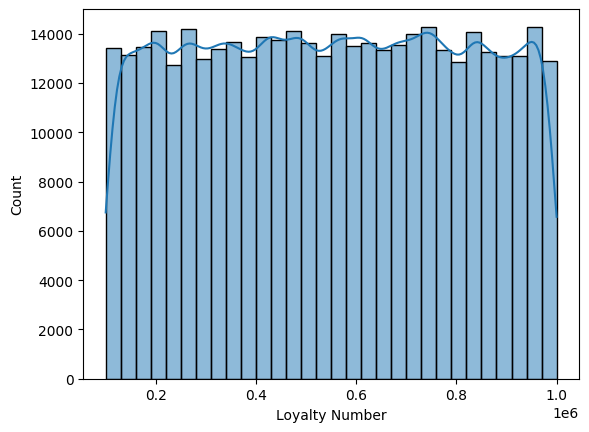

In [34]:
sns.histplot(data=df_activity, x='Loyalty Number', bins=30, kde=True)

#### La distribucion de los Loyalty Number parece ser uniforme

In [35]:
def exploracion_num(dataframe, col):
    print(f'El mínimo de {col} es {dataframe[col].min()}')
    print(f'El máximo de {col} es {dataframe[col].max()}')
    print(f'La media de {col} es {dataframe[col].mean()}')
    print(f'La mediana de {col} es {dataframe[col].median()}')

    sns.histplot(data=dataframe, x=col)
    plt.show();
    sns.boxplot(data=dataframe, x=col)
    plt.show();

In [36]:
df_activity.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

El mínimo de Year es 2017
El máximo de Year es 2018
La media de Year es 2017.5
La mediana de Year es 2017.5


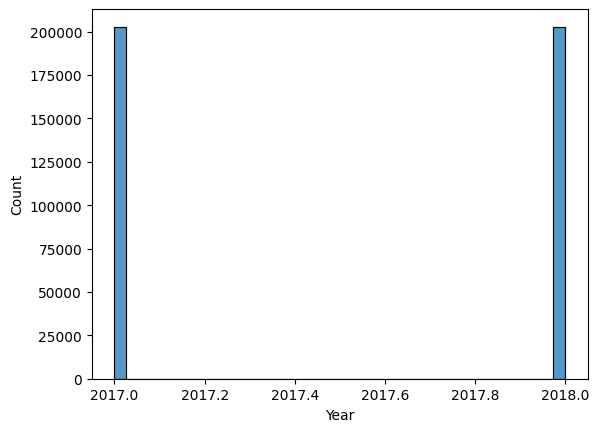

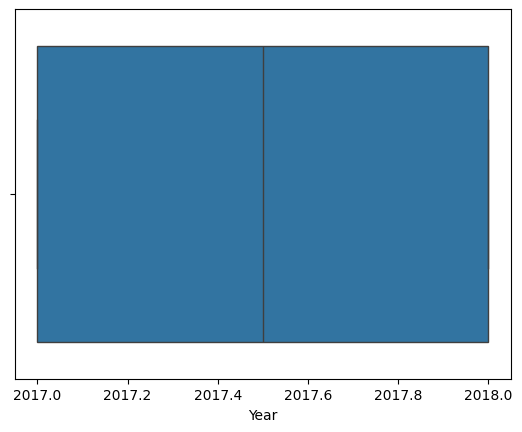

In [37]:
exploracion_num(df_activity, 'Year')

In [38]:
# Los clientes han viajado principalmente en los años 2017-2018. 

El mínimo de Month es 1
El máximo de Month es 12
La media de Month es 6.5
La mediana de Month es 6.5


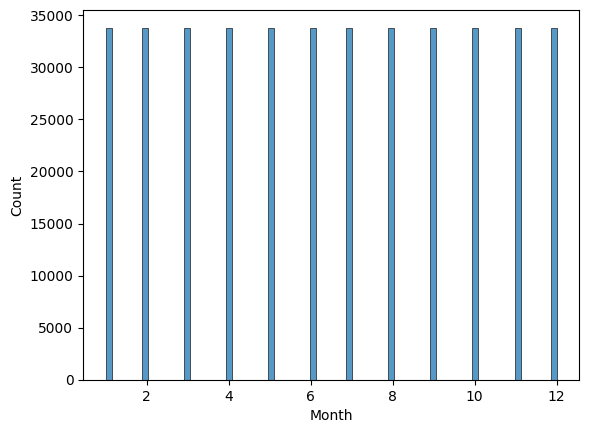

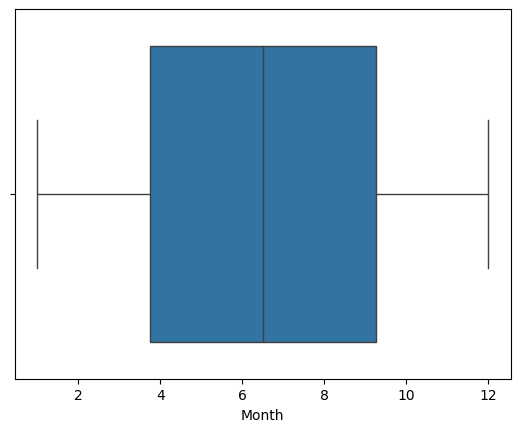

In [39]:
exploracion_num(df_activity, 'Month')

In [40]:
# Y han viajado durante todos los meses del año de forma homogénea

El mínimo de Flights Booked es 0
El máximo de Flights Booked es 21
La media de Flights Booked es 4.115052363765457
La mediana de Flights Booked es 1.0


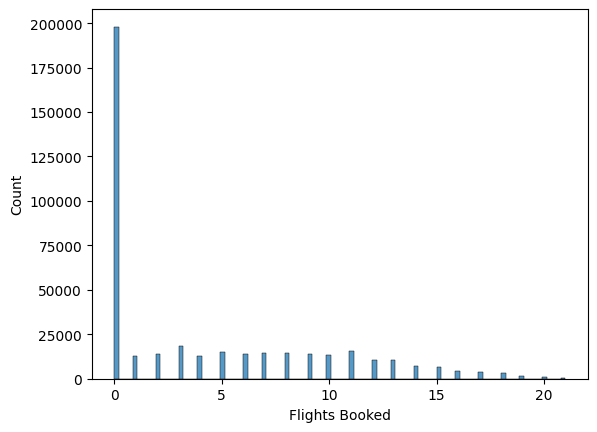

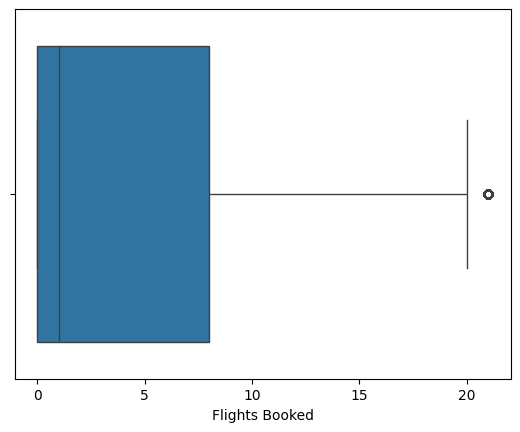

In [41]:
exploracion_num(df_activity, 'Flights Booked')

#### Este histograma muestra la distribución del número total de vuelos reservados por cliente en un mes específico. La interpretación muestra una fuerte asimetría, ya que está sesgada a la derecha (asimetría positiva). 

#### La característica más importante es el pico masivo en 0 vuelos reservados. Esto indica que la gran mayoría de los registros de actividad corresponden a meses donde el cliente **no realizó ninguna reserva**.

#### Hay un grupo pequeño pero significativo de clientes que reservan un número bajo de vuelos. Mientras que los clientes que reservan 5 o más vuelos son mucho menos comunes. 

<Axes: xlabel='Month', ylabel='Flights Booked'>

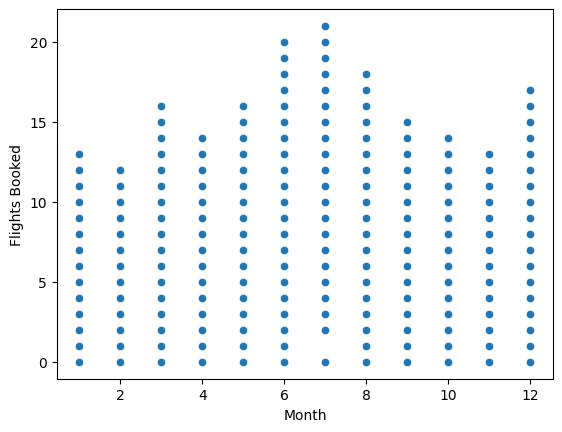

In [42]:
sns.scatterplot(data=df_activity, x='Month', y='Flights Booked')

#### Teniendo en cuenta las gráficas anteriores, es interesante ver como este scatterplot muestra la relación entre el mes del año y el numero de vuelos reservados por los clientes. 

#### Al observar los valores máximos de vuelos reservados por mes, se identifica un patrón estacional claro: 

#### - El número máximo de vuelos reservados por un solo cliente tiende a ser significativamente mayor durante los meses de verano (junio, julio y agosto). 

#### - Junio (6) y Julio (7) muestran los puntos más altos, superando las 20 reservas. 

#### - Los meses de baja actividad máxima ocurren a principios y a finales de año, aunque el mes de Diciembre (12) experimenta un repunte notable, siendo consistente con la temporada de viajes de fin de año y días festivos. 

El mínimo de Flights with Companions es 0
El máximo de Flights with Companions es 11
La media de Flights with Companions es 1.031805317239611
La mediana de Flights with Companions es 0.0


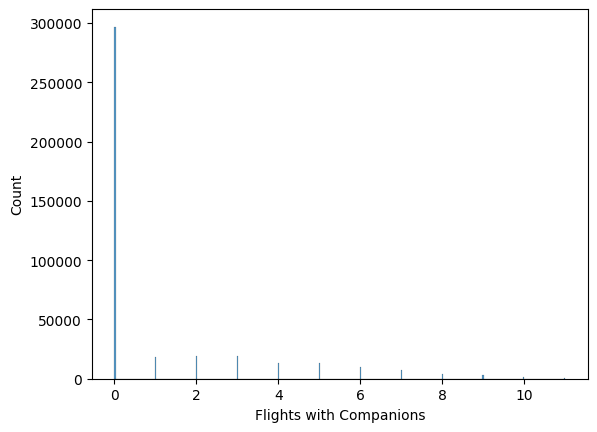

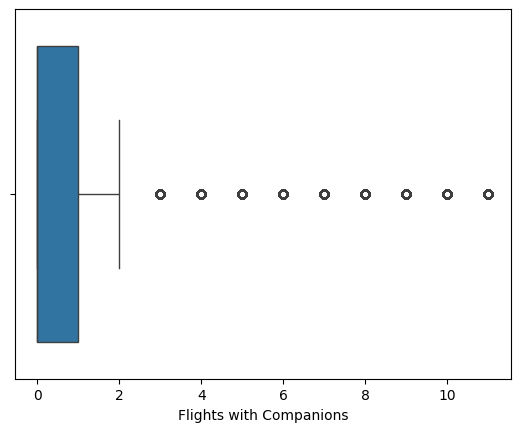

In [43]:
exploracion_num(df_activity, 'Flights with Companions')

<Axes: xlabel='Month', ylabel='Flights with Companions'>

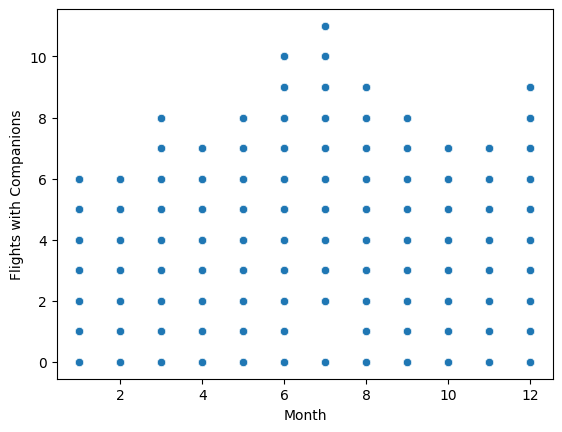

In [44]:
sns.scatterplot(data=df_activity, x='Month', y='Flights with Companions')

#### Las gráficas muestran que la gran mayoría de clientes viajan solos. Siendo de nuevo en los meses de verano y Diciembre, cuando además de mas viajes reservados, se viaja acompañado. 

__________

### Customer Loyalty History.csv

Este archivo proporciona un perfil detallado de los clientes, incluyendo su ubicación, nivel educativo, ingresos, estado civil, y detalles sobre su membresía en el programa de lealtad (como el tipo de tarjeta, valor de vida del cliente, y fechas de inscripción y cancelación).

- **Loyalty Number:** Identificador único del cliente dentro del programa de lealtad. Este número permite correlacionar la información de este archivo con el archivo de actividad de vuelos.
- **Country:** País de residencia del cliente.
- **Province:** Provincia o estado de residencia del cliente (aplicable a países con divisiones provinciales o estatales, como Canadá).
- **City:** Ciudad de residencia del cliente.
- **Postal Code:** Código postal del cliente.
- **Gender:** Género del cliente (ej. Male para masculino y Female para femenino).
- **Education:** Nivel educativo alcanzado por el cliente (ej. Bachelor para licenciatura, College para estudios universitarios o técnicos, etc.).
- **Salary:** Ingreso anual estimado del cliente.
- **Marital Status:** Estado civil del cliente (ej. Single para soltero, Married para casado, Divorced para divorciado, etc.).
- **Loyalty Card:** Tipo de tarjeta de lealtad que posee el cliente. Esto podría indicar distintos niveles o categorías dentro del programa de lealtad.
- **CLV (Customer Lifetime Value):** Valor total estimado que el cliente aporta a la empresa durante toda la relación que mantiene con ella.
- **Enrollment Type:** Tipo de inscripción del cliente en el programa de lealtad (ej. Standard).
- **Enrollment Year:** Año en que el cliente se inscribió en el programa de lealtad.
- **Enrollment Month:** Mes en que el cliente se inscribió en el programa de lealtad.
- **Cancellation Year:** Año en que el cliente canceló su membresía en el programa de lealtad, si aplica.
- **Cancellation Month:** Mes en que el cliente canceló su membresía en el programa de lealtad, si aplica.


In [45]:
df_history = pd.read_csv('Customer Loyalty History.csv')

df_history.head(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN


In [46]:
# Valores nulos detectados en las columnas de 'Salary', 'Cancellation Year' y 'Cancellation Month'. 

In [47]:
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [48]:
df_history.shape

(16737, 16)

In [49]:
df_history.isna().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [50]:
round(df_history.isna().sum()/df_history.shape[0]*100, 2)

Loyalty Number         0.00
Country                0.00
Province               0.00
City                   0.00
Postal Code            0.00
Gender                 0.00
Education              0.00
Salary                25.32
Marital Status         0.00
Loyalty Card           0.00
CLV                    0.00
Enrollment Type        0.00
Enrollment Year        0.00
Enrollment Month       0.00
Cancellation Year     87.65
Cancellation Month    87.65
dtype: float64

In [51]:
# Son valores nulos con porcentajes altos y muy altos. 

In [52]:
df_history.duplicated().sum()

np.int64(0)

In [53]:
df_history.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [55]:
df_history.duplicated(subset='Loyalty Number').sum()

np.int64(0)

In [58]:
df_history.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [60]:
# Llama la atencion que el valor minimo de salario está en negativo...

In [59]:
df_history.describe(include='O').T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


# Exploracion en detalle de los insights obtenidos en la fase anterior

In [61]:
df_history['Salary'].isna().sum()

np.int64(4238)

In [62]:
df_history['Salary'].value_counts(dropna=False)

Salary
 NaN         4238
 101933.0      23
 62283.0       14
 51573.0       14
 61809.0       14
             ... 
 70732.0        1
 99706.0        1
 99204.0        1
 47702.0        1
-57297.0        1
Name: count, Length: 5891, dtype: int64

In [63]:
df_history['Salary'].unique()

array([ 83236.,     nan, 103495., ...,  76178.,  91970., -57297.],
      shape=(5891,))

In [64]:
df_history['Salary'].nunique()

5890

In [65]:
df_history['Salary'].value_counts(dropna=False, normalize=True)*100

Salary
 NaN         25.321145
 101933.0     0.137420
 62283.0      0.083647
 51573.0      0.083647
 61809.0      0.083647
               ...    
 70732.0      0.005975
 99706.0      0.005975
 99204.0      0.005975
 47702.0      0.005975
-57297.0      0.005975
Name: proportion, Length: 5891, dtype: float64

In [ ]:
# antes de trabajar con los nulos, convertiremos el dato negativo a numeros absolutos para que no perjudique tanto a los valores generales. Es interpretado como un error de tecleo 

In [68]:
df_history['Salary'] = df_history['Salary'].abs()

In [69]:
df_history['Salary'].unique()

array([ 83236.,     nan, 103495., ...,  76178.,  91970.,  57297.],
      shape=(5891,))

In [70]:
df_history.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79359.340907,34749.691464,9081.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [75]:
round(df_history['Salary'].value_counts(dropna=False, normalize=True)*100, 2)

Salary
NaN         25.32
101933.0     0.14
62283.0      0.08
51573.0      0.08
61809.0      0.08
            ...  
70732.0      0.01
99706.0      0.01
99204.0      0.01
47702.0      0.01
57297.0      0.01
Name: proportion, Length: 5891, dtype: float64

In [73]:
# Ahora vemos que los datos han cambiado, pero seguimos teniendo un 25% de valores nulos...

El mínimo de Salary es 9081.0
El máximo de Salary es 407228.0
La media de Salary es 79359.34090727258
La mediana de Salary es 73455.0


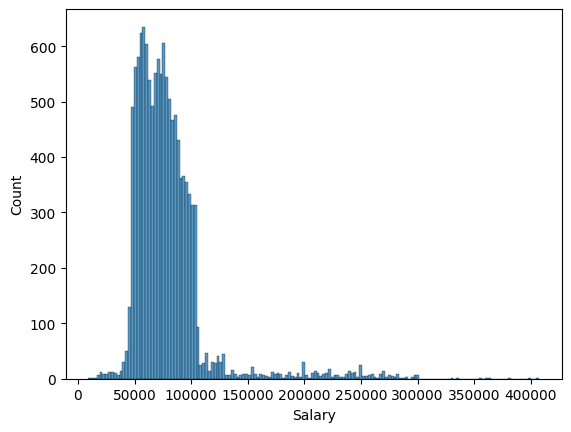

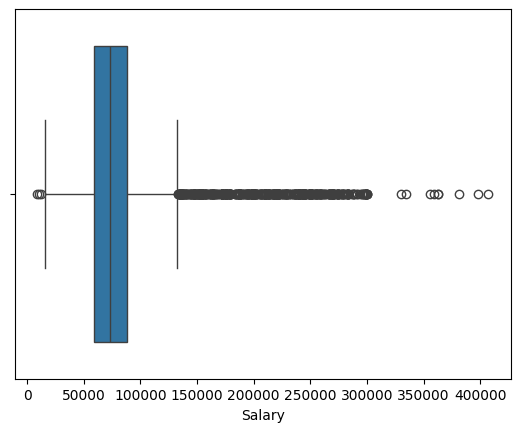

In [76]:
exploracion_num(df_history, 'Salary')

#### El análisis de la columna de 'Salary' revela una fuerte asimetría positiva, con la mayoría de los clientes concentrados en el rango de 50,000 a 100,000. Dado que el 25% de los datos de salario están nulos, y la distribución es sesgada, la estrategia de imputación más robusta y recomendable es utilizar la mediana (73,455) en lugar de la media, para evitar sesgar el conjunto de datos con los valores extremos altos. 

#### Descartar el 25% de datos sería inaceptable, ya que reduciría drásticamente el tamaño del conjunto y potencialmente introduciría sesgos si los clientes con salarios faltantes no son aleatorios. 

#### La media es sensible a los valores extremos, así que usarla para imputar el 25% de los datos inflaría artificialmente la distribución, indicando un salario promedio que no representa a la mayoría. 

In [77]:
df_history['Salary'].median()

np.float64(73455.0)

In [78]:
df_history['Salary'].fillna(df_history['Salary'].median(), inplace=True)

In [79]:
round(df_history['Salary'].value_counts(dropna=False, normalize=True)*100, 2)

Salary
73455.0     25.33
101933.0     0.14
62283.0      0.08
51573.0      0.08
61809.0      0.08
            ...  
70732.0      0.01
99706.0      0.01
99204.0      0.01
47702.0      0.01
57297.0      0.01
Name: proportion, Length: 5890, dtype: float64

In [80]:
df_history['Salary'].unique()

array([ 83236.,  73455., 103495., ...,  76178.,  91970.,  57297.],
      shape=(5890,))

In [81]:
round(df_history.isna().sum()/df_history.shape[0]*100, 2)

Loyalty Number         0.00
Country                0.00
Province               0.00
City                   0.00
Postal Code            0.00
Gender                 0.00
Education              0.00
Salary                 0.00
Marital Status         0.00
Loyalty Card           0.00
CLV                    0.00
Enrollment Type        0.00
Enrollment Year        0.00
Enrollment Month       0.00
Cancellation Year     87.65
Cancellation Month    87.65
dtype: float64

In [82]:
df_history['Cancellation Year'].unique()

array([  nan, 2018., 2015., 2017., 2014., 2016., 2013.])

In [83]:
df_history['Cancellation Month'].unique()

array([nan,  1., 12.,  4.,  2.,  7., 11.,  5.,  6., 10.,  8.,  9.,  3.])

In [84]:
df_history['Cancellation Year'].isna().sum()

np.int64(14670)

In [85]:
df_history.shape

(16737, 16)

In [86]:
df_history['Cancellation Month'].isna().sum()

np.int64(14670)

In [91]:
df_history['Cancellation Year'].value_counts(dropna=False)


Cancellation Year
NaN       14670
2018.0      645
2017.0      506
2016.0      427
2015.0      265
2014.0      181
2013.0       43
Name: count, dtype: int64

In [88]:
df_history['Cancellation Month'].value_counts(dropna=False)

Cancellation Month
NaN     14670
12.0      213
11.0      212
8.0       208
7.0       186
10.0      180
9.0       176
6.0       165
1.0       155
3.0       149
5.0       148
2.0       139
4.0       136
Name: count, dtype: int64

In [101]:
#como el numero de nans en ambas columnas es el mismo, es tomado por obvio que son de las mismas filas. por este motivo, agregaré una nueva columna que indique qué cliente SI han cancelado ya, para poder hacer un estudio y analisis de datos basado en los datos que SI tenemos. 

In [102]:
df_history['Cancellation Year'].notna().astype(int)

0        0
1        0
2        1
3        0
4        0
        ..
16732    0
16733    0
16734    0
16735    0
16736    1
Name: Cancellation Year, Length: 16737, dtype: int64

In [103]:
# de este modo, 0 significa 'No cancelado' (justo de donde provienen los NAN), mientras que 1 significa 'Registrado Cancelado', ya que hay datos que confirman la cancelacion del cliente

In [106]:
df_history['Cancellation Year'].dtype

dtype('float64')

In [ ]:
# df_history['Cancellation Year'] = df_history['Cancellation Year'].fillna('full time')

In [104]:
df_history['Already Cancelled'] = df_history['Cancellation Year'].notna().astype(int)

In [107]:
df_history.head(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Already Cancelled
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,0
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,73455.0,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN,0


In [93]:
# hay que encontrar la manera de encontrar patrones que indiquen si alguno de esos clientes que tienen valores nulos, han cesado su actividad en algun momento y dan indicio de una cancelacion (sin haberse registrado en la base de datos). 

In [108]:
df_unido = pd.merge(df_history, df_activity, on='Loyalty Number')

In [109]:
df_unido.head(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Already Cancelled,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,0,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,0,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,0,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,0,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,0,2018,10,6,2,8,3352,335.0,465,38


In [112]:
df_unido.sample(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Already Cancelled,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
40723,333680,Canada,Ontario,Toronto,P2T 6G3,Female,Bachelor,97115.0,Married,Aurora,6291.66,Standard,2013,11,NaN,NaN,0,2018,7,8,3,11,1661,166.0,0,0
179971,327910,Canada,Alberta,Calgary,T3E 2V9,Male,Bachelor,83889.0,Married,Nova,6847.12,Standard,2015,11,NaN,NaN,0,2018,8,0,0,0,0,0.0,0,0
356105,526374,Canada,Ontario,Toronto,M2P 4F6,Female,Bachelor,68448.0,Married,Star,7597.91,Standard,2016,8,NaN,NaN,0,2017,10,5,1,6,1698,169.0,553,45
401318,563977,Canada,Quebec,Montreal,H4G 3T4,Female,Bachelor,64046.0,Single,Star,26016.53,Standard,2015,11,NaN,NaN,0,2018,3,0,0,0,0,0.0,0,0
118865,454609,Canada,British Columbia,West Vancouver,V6V 8Z3,Male,Bachelor,99062.0,Single,Nova,3226.52,Standard,2018,6,NaN,NaN,0,2018,6,0,0,0,0,0.0,0,0


In [100]:
df_unido.shape

(405624, 25)

In [97]:
df_activity.groupby(['Year', 'Month', 'Flights Booked'])['Loyalty Number'].count().reset_index()

,Year,Month,Flights Booked,Loyalty Number
0,2017,1,0,9435
1,2017,1,1,823
2,2017,1,2,390
3,2017,1,3,743
4,2017,1,4,769
...,...,...,...,...
391,2018,12,13,492
392,2018,12,14,487
393,2018,12,15,494
394,2018,12,16,468


In [ ]:
# sin embargo, no podemos saber si un cliente identificado como 'activo' volvió a volar en 2019 o despues, ya que la bbdd muestra la actividad de los años 2017 y 2018. Se podria considerar a activos solo a aquellos NAN que tuvieron actividad muy reciente? 